In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Evaluating Optimal Regularization Combination

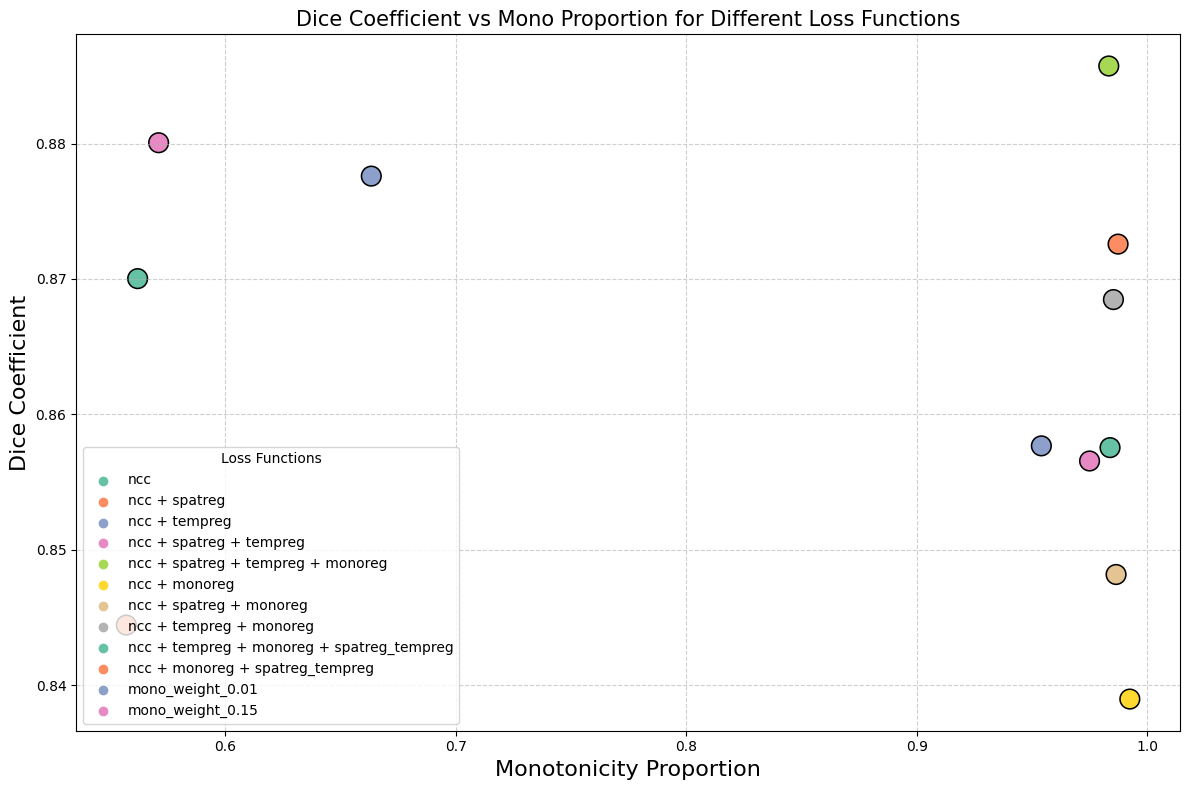

In [3]:
data = pd.read_csv('evaluating_optimal_regularization_combination.csv')
palette = sns.color_palette("Set2", n_colors=len(data['loss_functions'].unique()))
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x='mono_proportion',
    y='dice',
    hue='loss_functions',
    palette=palette, 
    s=200,  
    edgecolor='black', 
    legend='full'
)
plt.title('Dice Coefficient vs Mono Proportion for Different Loss Functions', fontsize=15)
plt.xlabel('Monotonicity Proportion', fontsize=16)
plt.ylabel('Dice Coefficient', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Loss Functions', loc='lower left', fontsize=10)
plt.tight_layout()
plt.show()


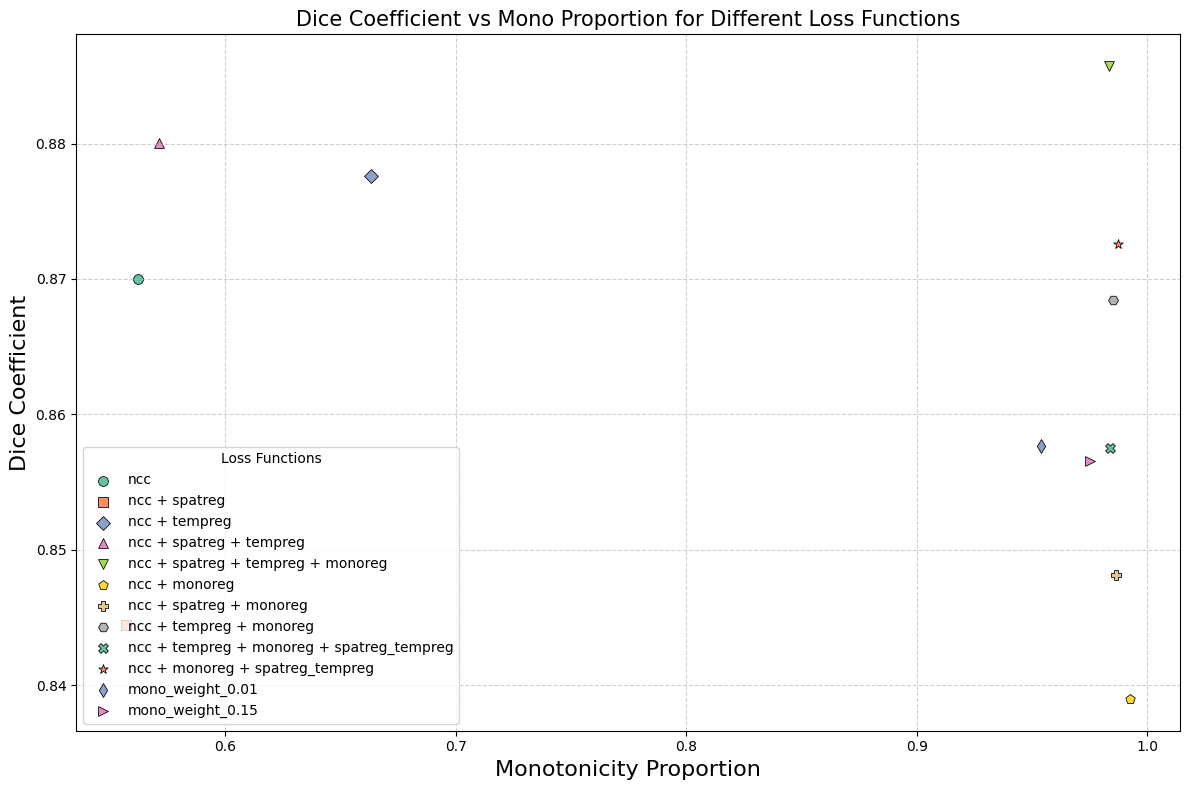

In [4]:
markers = ['o', 's', 'D', '^', 'v', 'p', 'P', 'H', 'X', '*', 'd', '>']
plt.figure(figsize=(12, 8))

#plot model type separately with different markers
for i, loss_functions in enumerate(data['loss_functions'].unique()):
    subset = data[data['loss_functions'] == loss_functions]
    sns.scatterplot(
        x=subset['mono_proportion'],
        y=subset['dice'],
        label=loss_functions,
        color=palette[i], 
        marker=markers[i], 
        s=50, 
        edgecolor='black'
    )
plt.title('Dice Coefficient vs Mono Proportion for Different Loss Functions', fontsize=15)
plt.xlabel('Monotonicity Proportion', fontsize=16)
plt.ylabel('Dice Coefficient', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Loss Functions', loc='lower left', fontsize=10)
plt.tight_layout()
plt.show()


### AD vs MCI vs CN

/its/home/as2614/.cache/pypoetry/virtualenvs/lowhighfieldreg-JaCS1Bme-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/its/home/as2614/.cache/pypoetry/virtualenvs/lowhighfieldreg-JaCS1Bme-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/its/home/as2614/.cache/pypoetry/virtualenvs/lowhighfieldreg-JaCS1Bme-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset

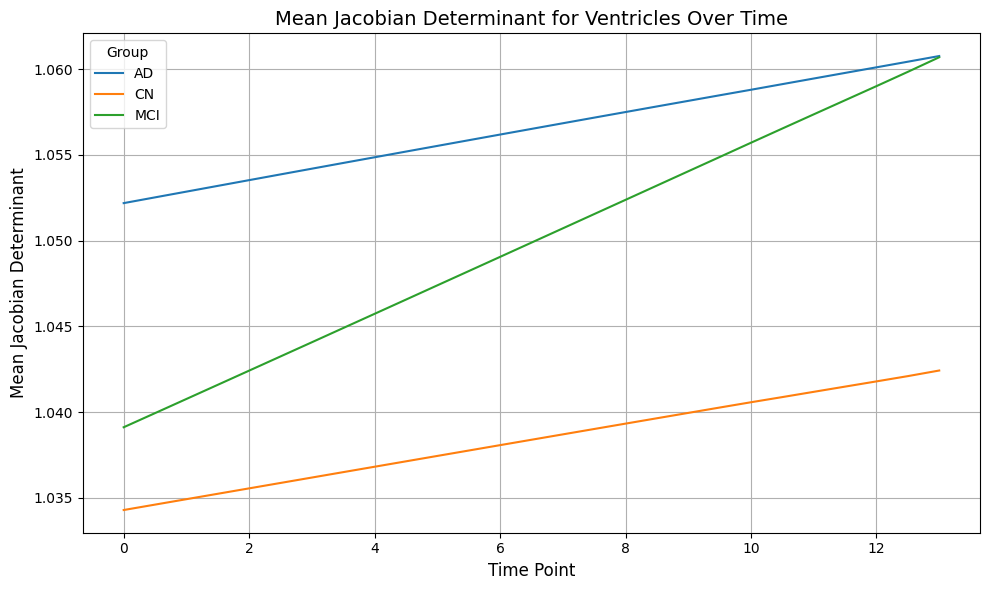

In [11]:
group_jacobian_metrics = "group_jacobian_metrics.csv"
df = pd.read_csv(group_jacobian_metrics)

ventricles_df = df[df["structure"].str.contains("ventricle", case=False)]

grouped = ventricles_df.groupby(["time_point", "group"])["jac_det_mean"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grouped,
    x="time_point",
    y="jac_det_mean",
    hue="group",
)
plt.title("Mean Jacobian Determinant for Ventricles Over Time", fontsize=14)
plt.xlabel("Time Point", fontsize=12)
plt.ylabel("Mean Jacobian Determinant", fontsize=12)
plt.legend(title="Group", fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()


/its/home/as2614/.cache/pypoetry/virtualenvs/lowhighfieldreg-JaCS1Bme-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/its/home/as2614/.cache/pypoetry/virtualenvs/lowhighfieldreg-JaCS1Bme-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/its/home/as2614/.cache/pypoetry/virtualenvs/lowhighfieldreg-JaCS1Bme-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset

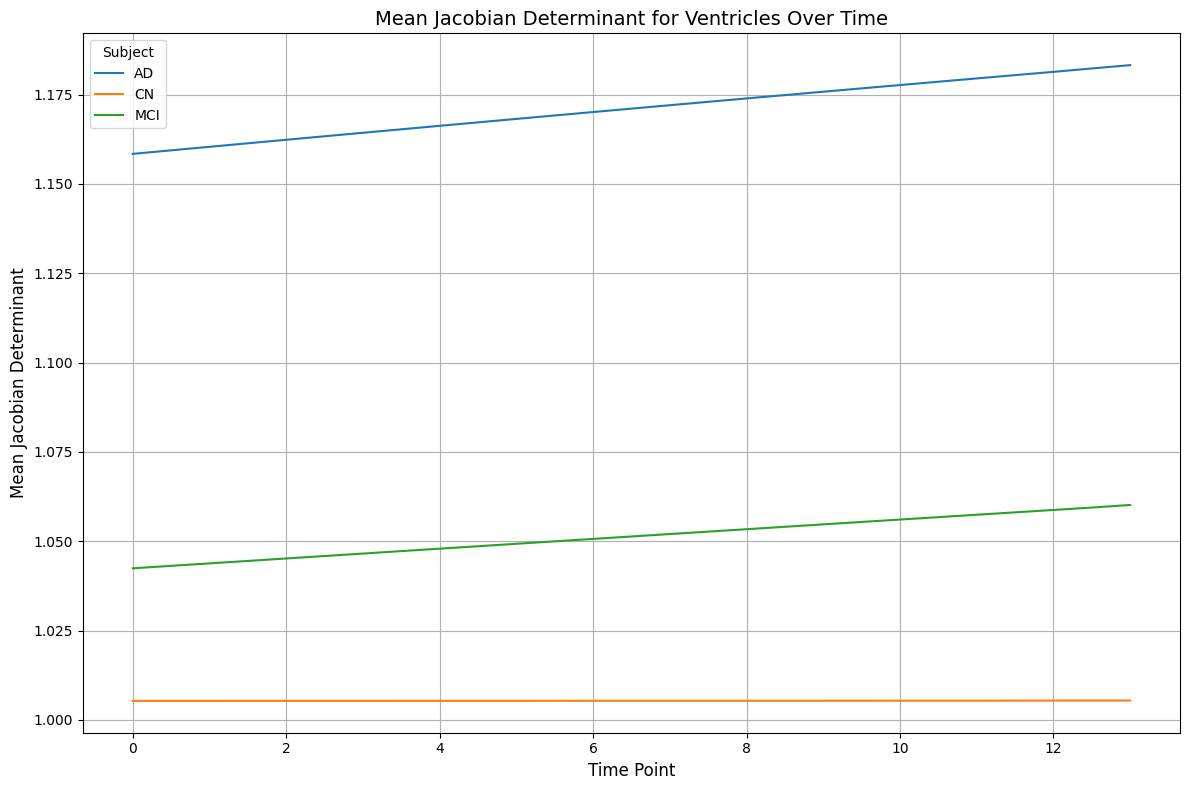

In [16]:


ad_subjects = ["005_S_0814"]  
# mci_subjects = ["002_S_1155"]
mci_subjects = ["003_S_1122"]
cn_subjects = ["098_S_4506"]

specific_subjects = ad_subjects + mci_subjects + cn_subjects

ventricles_df = df[df["structure"].str.contains("ventricle", case=False, na=False)]
filtered_df = ventricles_df[ventricles_df["subjectID"].isin(specific_subjects)]

grouped = filtered_df.groupby(["time_point", "group", "subjectID"], as_index=False)["jac_det_mean"].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=grouped,
    x="time_point",
    y="jac_det_mean",
    hue="group",
    # style="subjectID",
    # markers=True
)

plt.title("Mean Jacobian Determinant for Ventricles Over Time", fontsize=14)
plt.xlabel("Time Point", fontsize=12)
plt.ylabel("Mean Jacobian Determinant", fontsize=12)
plt.legend(title="Subject", fontsize=10)
plt.grid(visible=True)
plt.tight_layout()
plt.show()
